# Prediction of Breast Cancer Classification

In [ ]:
#importing pandas to read the dataset
import pandas as pd

dataset = pd.read_csv('/content/breast-cancer-wisconsin.data 2.txt', header = None)

dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
#to find out total rown and columns
dataset.shape

(699, 11)

In [ ]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses','Class']

dataset.columns = (col_names)

dataset.head(10)


,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [ ]:
#to get basic information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
#identifying missing value in Bare Nuclei column
dataset['Bare_Nuclei'].value_counts()

Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [ ]:
dataset['Bare_Nuclei'] = pd.to_numeric(dataset['Bare_Nuclei'], errors = 'coerce')

dataset.info()

#dataset['Bare_Nuclei'] = pd.to_numeric(dataset['Bare_Nuclei'], errors = 'coerce) - any not a numeric will be converted to NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_Cell_Size         699 non-null    int64  
 3   Uniformity_Cell_Shape        699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [ ]:
#since there was missing value and there is a huge gap in between distribution of data, we calculate the mid value to replace, not the mean value
dataset['Bare_Nuclei'].replace(np.nan, dataset['Bare_Nuclei'].median(), inplace = True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_Cell_Size         699 non-null    int64  
 3   Uniformity_Cell_Shape        699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  699 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [ ]:
#to check the replaced missing value
dataset['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     418
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [ ]:
#to know how many category in target value
dataset['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [ ]:
dataset.drop('Id', axis = 1, inplace = True)

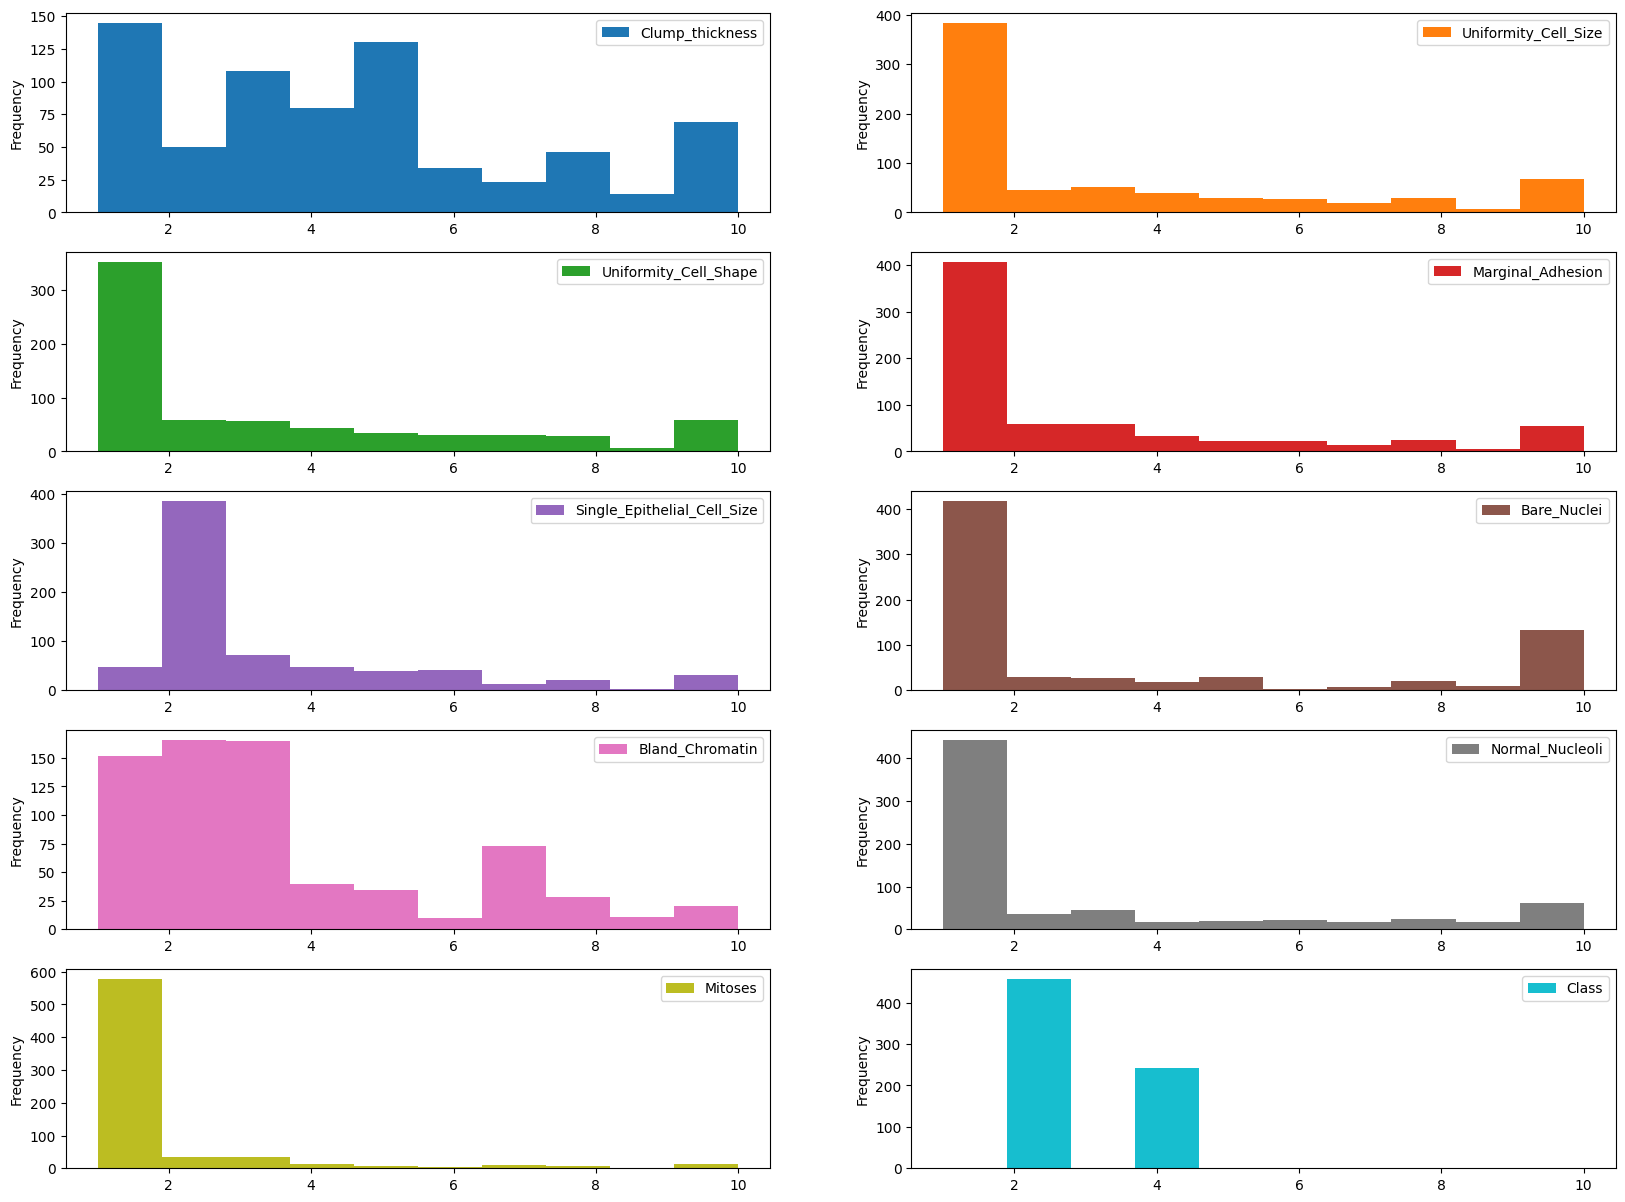

In [ ]:
#histogram

plt.rcParams['figure.figsize'] = (20,15)

dataset.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()


In [ ]:
#to find the correlation between the features in the dataset
dataset.corr()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
Clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland_Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [ ]:
correlations = dataset.corr()

correlations['Class'].sort_values(ascending = False)

Class                          1.000000
Bare_Nuclei                    0.818968
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Id                            -0.080226
Name: Class, dtype: float64

In [ ]:
#assigning x axis and y axis for data split
x = dataset.drop('Class', axis = 1)
y = dataset['Class']

In [ ]:
#train_test_split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 24)

print(x_train.shape)
print(x_test.shape)

(559, 10)
(140, 10)


In [ ]:
#normalising data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train[:5]

array([[ 0.38875962,  1.65683997,  1.27419992,  1.27554054,  0.79569589,
         0.84672178,  1.82761037,  1.44578202,  1.66586661,  0.93098846],
       [-0.42406795, -0.13183045, -0.37306593, -0.40851039, -0.62764492,
        -0.53859766, -0.68117756, -0.5982042 , -0.60936412, -0.33217307],
       [ 0.03975082,  0.22590363, -0.37306593, -0.0717002 ,  0.43986069,
        -0.53859766,  0.99134773, -0.18940695,  1.01580069, -0.33217307],
       [-0.07162846, -1.2050327 , -0.7025191 , -0.74532057, -0.62764492,
        -0.53859766,  1.82761037, -0.18940695, -0.60936412, -0.33217307],
       [ 0.41311821,  0.58363772, -0.37306593, -0.0717002 , -0.62764492,
        -0.53859766, -0.68117756, -1.00700144, -0.60936412, -0.33217307]])

In [ ]:
#modeling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbor = KNeighborsClassifier()

#training
neighbor.fit(x_train, y_train)

#prediction

y_pred = neighbor.predict(x_test)

#evaluation

print('The accuracy is:', (accuracy_score(y_pred,y_test))*100)


The accuracy is: 99.28571428571429


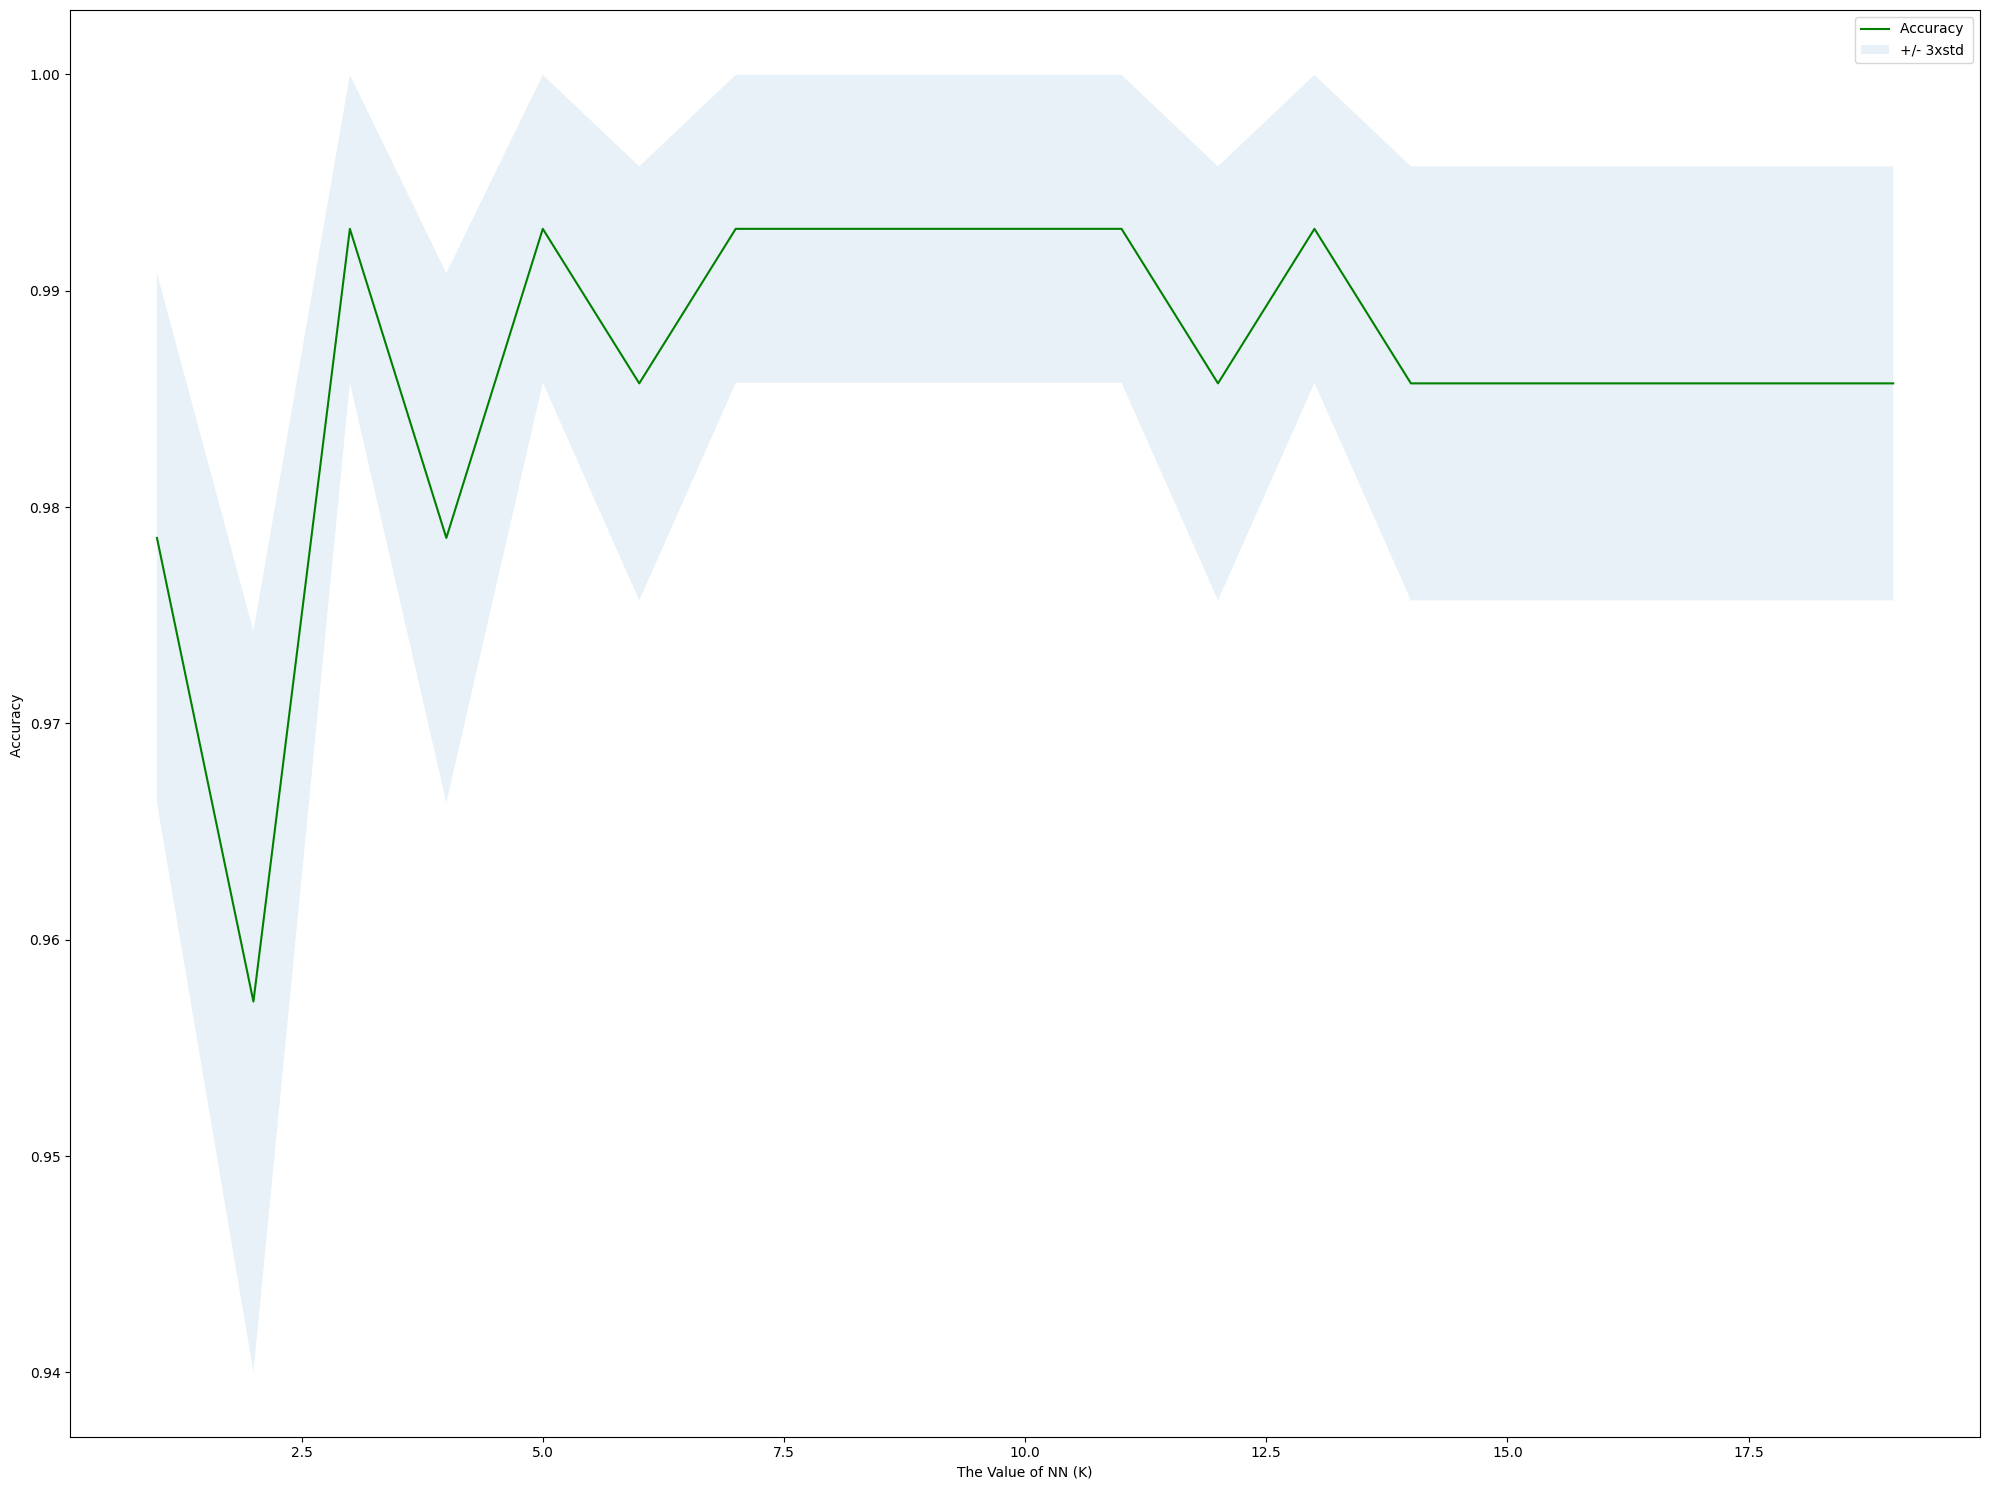



The best accuracy was with 0.9928571428571429 with k= 3


In [ ]:
#optimisation of accuracy - tuning the parameters
#now the k = 50

import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

Ks =20 #the range of K
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): #for loop

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc)

print ('')
print ('')

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
#to identify the confusion matrix report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('The Confusion Matrix is:', cm)

print('')

print('TP is', cm[0][0]) #True positive
print('TN is', cm[1][1]) #True Negative
print('FP is', cm[0][1]) #False Positive
print('FN is', cm[1][0])# False Negative

The Confusion Matrix is: [[90  0]
 [ 1 49]]

TP is 90
TN is 49
FP is 0
FN is 1


The **correct prediction** is the True Positive and the True Negative which means 90 + 49 = 139.

The **incorrect prediction** is False Positive and False Negative, which means 0 + 1 = 1.

###**Check the over fitting**

In [ ]:
print('The accuracy based in training set is:', neighbor.score(x_train, y_train))
print('The accuracy based in testing set is:', neighbor.score(x_test, y_test))

#the model does not overfitting since the gap is niche
#if huge gap means there is an issue in learning

The accuracy based in training set is: 0.964221824686941
The accuracy based in testing set is: 0.9928571428571429


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.99      1.00      0.99        90
           4       1.00      0.98      0.99        50

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



**Precision**: the relationship of correctly predicted positive (TP) to the total prediction of positive (TP + FP)

**Recall**: the relationship of correctly predicted positive (TP) to the total prediction of positive and negative (TP + FN)